459 свечей прочитано


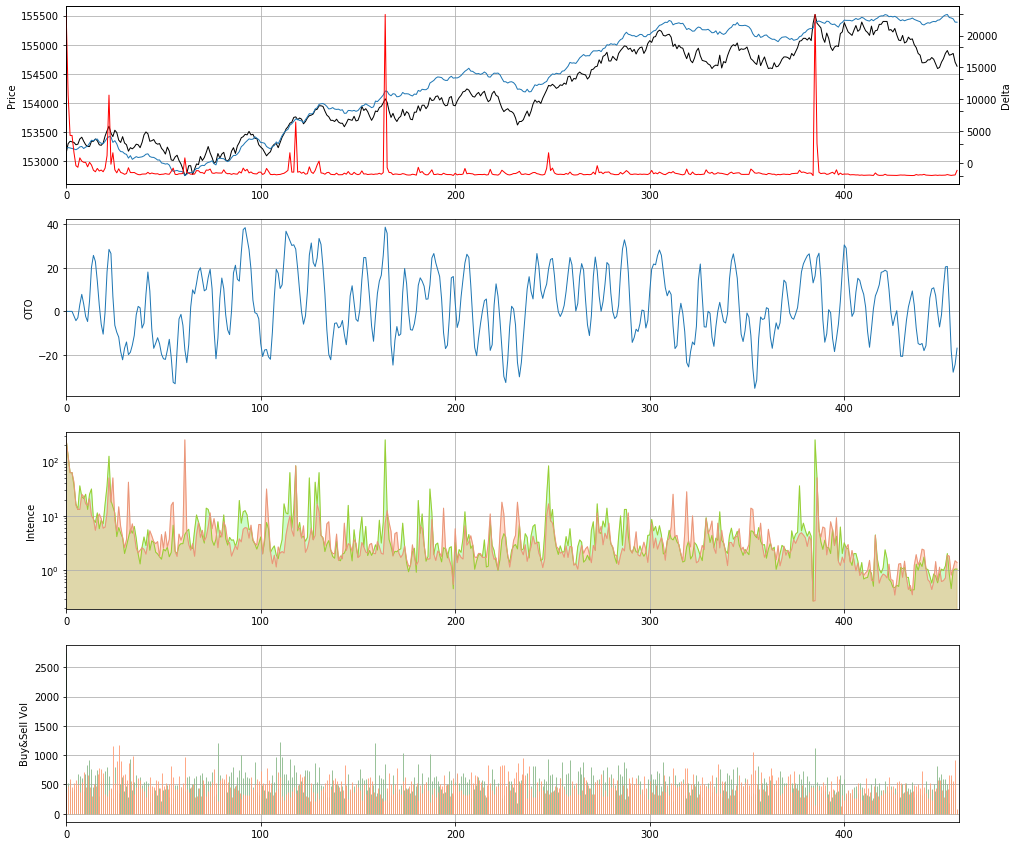

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#Исходными данными являются файлы в формате csv.
#Файлы находятся в папке Jatotrader\DATASET\имятикера\. Каждый файл содержит в себе информацию по одной торговой сессии
#одного тикера с заданным методом формирования баров. Дата сессии и метод формирования баров указаны в имени файла.
#Например, в файле 2020-02-03_RIH0_TICKS_500.FRQ содержится информация за 3 февраля 2020 года по фьючерсному контракту RIH0,
#сформированная из расчета 500 тиков на бар. Первая строка файла - это имена столбцов DATETIME,H,L,O,C,DH,DL,DO,DC,OTO,
#BI,SI,BV,SV,BC,SC. Последующие строки - это бары, идущие в хронологическом порядке. DATETIME-строка в формате
#"ГГГГ-ММ-ДД ЧЧ:ММ:СС", H,L,O,C - максимальная, минимальная цена и цена открытия и закрытия бара. DH и DL - максимальное
# и минимальное значение накопленной маркет-дельты бара, DO и DC - значение маркет-дельты при открытии и закрытии бара.
#OTO - значение объемно-тикового осциллятора на закрытии бара, BI-интенсивность покупок (тиков в секунду),
#SI- интенсивность продаж, BV-объем покупок, SV-объем продаж, BC-количество покупок,SC-количество продаж

#Читаем в датафрейм candles из файлов с частотными данными за соответствующую дату с соотв. частотными настройками
candles=pd.read_csv('C:\\acl90-smp\\DATASET\\RIH0\\2020-02-04_RIH0_TICKS_500.frq', header=0, sep=',')
MOEXCloseTime=pd.to_datetime(candles['DATETIME'][0][0:11]+'23:50:00') #Определяем ДатуВремя закрытия торгов
candles['DATETIME']= pd.to_datetime(candles['DATETIME']) #Преобразуем весь столбец DATETIME в формат datetime
clen=len(candles) #Общее количество частотных свечей в наборе данных

#Эти два параметра можно менять для удобства просмотра. По умолчанию на графике умещается весь набор.
istart=0 #Индекс первой свечи на графике
xwidth= min(clen, clen) #Количество свечей, отображаемое на графике

fig, [axPrice, axOTO, axIntence, axVol] = plt.subplots(4, 1, figsize=(16, 15)) #Четыре секции графика с соответствующими осями для индикаторов
axPrice.set_ylabel('Price')
axOTO.set_ylabel('OTO')
axIntence.set_ylabel('Intence')
axVol.set_ylabel('Buy&Sell Vol')
axIntence.set_yscale('log') #Логарифмическая шкала интенсивностей покупок продаж
axDELTA = axPrice.twinx() #Дополнительная шкала маркет-дельты на графике цены
axDELTA.set_ylabel('Delta')
for ax in [axPrice, axOTO, axIntence, axVol]: #цикл по секциям
    ax.grid(True) #Добавляем сетку в каждую секцию
    ax.set_xlim(xmin=istart, xmax=xwidth) #Задаем границы отображения по шкале X

t = np.arange(istart, xwidth) #Шкала Х по количеству свечей
axOTO.plot(t, candles['OTO'][istart:xwidth], linewidth=1) #Рисуем график ОТО 
axPrice.plot(t, candles['C'][istart:xwidth], color = 'black', linewidth=1) #Рисуем график цены
axDELTA.plot(t, candles['DC'][istart:xwidth], linewidth=1) #График маркет-дельты
axIntence.plot(t, candles['BI'][istart:xwidth], color = 'yellowgreen', linewidth=1) #График интенсивности покупок
axIntence.plot(t, candles['SI'][istart:xwidth], color = 'darksalmon', linewidth=1) #График интенсивности продаж
axIntence.fill_between(t, candles['BI'][istart:xwidth], 0, color='palegreen', alpha=0.5) #Заливка с прозрачным наложением
axIntence.fill_between(t, candles['SI'][istart:xwidth], 0, color='lightsalmon', alpha=0.4) #Заливка с прозрачным наложением
axVol.vlines(t-0.1, 0, candles['BV'][istart:xwidth], color='darkseagreen', linewidth=1, alpha=0.9) #Объем покупок
axVol.vlines(t+0.1, 0, candles['SV'][istart:xwidth], color='lightsalmon', linewidth=1, alpha=0.9) #Объем продаж
print(clen, "свечей прочитано") #Сколько всего свечей в наборе данных

#Рассчитаем длительность каждой свечи (в секундах) и добавим в таблицу под именем 'DUR'(создадим новый столбец)
#Эта строка кода означает, что мы берем разницу в секундах между временем текущей и последующей свечи, добавляем их в список
#длительностью последней свечи в наборе будет разница между временем окончания торговой сессии и временем начала свечи
candles['DUR']=[max(1,(candles['DATETIME'][i+1]-candles['DATETIME'][i]).seconds) for i in range (clen-1)]+[(MOEXCloseTime - candles.iloc[-1, 0]).seconds]
#Длительность свечей очень важный параметр, если мы рассматривает данные не как фиксированный таймфрейм, например 5 мин.
#Давайте посмотрим, есть ли корреляция этого параметра с ценой
axDUR = axPrice.twinx() #Дополнительная шкала длительности свечи на графике цены
axDUR.yaxis.set_ticklabels([]) #Не показывать шкалу длительности
axDUR.plot(t, 1/(candles['DUR'][istart:xwidth]), linewidth=1, color='r') #График скоротечности баров (длительность в знаменателе)
